In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/CS445/communities.csv')

In [31]:
X = df[['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','FemalePctDiv','TotalPctDiv','PersPerFam']]


y = df['ViolentCrimesPerPop']

In [32]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [33]:
ridge = Ridge(normalize = True)
coefs = []
for a in alphas:
 ridge.set_params(alpha = a)
 ridge.fit(X, y)
 coefs.append(ridge.coef_)
 
np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

(100, 28)

Text(0, 0.5, 'weights')

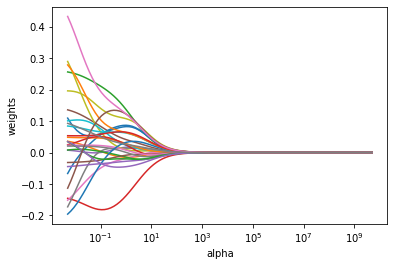

In [34]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [36]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [37]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

population         0.066769
householdsize     -0.012398
racepctblack       0.074195
racePctWhite      -0.077980
racePctAsian       0.011891
racePctHisp        0.026809
agePct12t21       -0.006325
agePct12t29        0.010673
agePct16t24        0.004151
agePct65up         0.010856
numbUrban          0.067857
pctUrban           0.012835
perCapInc         -0.022733
whitePerCap        0.000163
blackPerCap       -0.023311
indianPerCap      -0.011801
AsianPerCap       -0.002252
HispPerCap        -0.014102
NumUnderPov        0.080298
PctPopUnderPov     0.047624
PctLess9thGrade    0.033724
PctNotHSGrad       0.046986
PctBSorMore       -0.020467
PctUnemployed      0.050059
PctEmploy         -0.035481
FemalePctDiv       0.079440
TotalPctDiv        0.075632
PersPerFam         0.016679
dtype: float64
0.02892948488969258


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [38]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train) # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3)) # Calculate the test MSE

population         6.773562e-11
householdsize     -8.223972e-12
racepctblack       5.898244e-11
racePctWhite      -6.548523e-11
racePctAsian       4.040688e-12
racePctHisp        2.986163e-11
agePct12t21        7.220868e-12
agePct12t29        2.294955e-11
agePct16t24        1.247727e-11
agePct65up         1.168222e-11
numbUrban          6.636704e-11
pctUrban           4.525703e-12
perCapInc         -4.352177e-11
whitePerCap       -2.568674e-11
blackPerCap       -3.790671e-11
indianPerCap      -1.685984e-11
AsianPerCap       -1.654098e-11
HispPerCap        -3.319952e-11
NumUnderPov        8.198802e-11
PctPopUnderPov     5.519368e-11
PctLess9thGrade    4.615743e-11
PctNotHSGrad       5.694338e-11
PctBSorMore       -3.518232e-11
PctUnemployed      5.928463e-11
PctEmploy         -4.765434e-11
FemalePctDiv       7.534105e-11
TotalPctDiv        7.116219e-11
PersPerFam         1.851212e-11
dtype: float64
0.05426557772621238


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [57]:
ridge3.score(X_train,y_train)

7.342410013322365e-10

In [58]:
ridge3.score(X_test,y_test)

-2.3660970880357013e-06

In [39]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE


population         0.475381
householdsize      0.044586
racepctblack       0.253422
racePctWhite      -0.118469
racePctAsian       0.021123
racePctHisp        0.128268
agePct12t21       -0.195213
agePct12t29       -0.435783
agePct16t24        0.500163
agePct65up         0.093613
numbUrban         -0.461268
pctUrban           0.068889
perCapInc         -0.128931
whitePerCap        0.123296
blackPerCap       -0.043096
indianPerCap      -0.064079
AsianPerCap        0.031557
HispPerCap         0.014663
NumUnderPov        0.198523
PctPopUnderPov     0.130738
PctLess9thGrade   -0.215428
PctNotHSGrad       0.323311
PctBSorMore        0.056461
PctUnemployed      0.090927
PctEmploy          0.157029
FemalePctDiv      -0.204355
TotalPctDiv        0.518993
PersPerFam         0.113259
dtype: float64
0.02157228651257536


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [40]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE


population         0.475381
householdsize      0.044586
racepctblack       0.253422
racePctWhite      -0.118469
racePctAsian       0.021123
racePctHisp        0.128268
agePct12t21       -0.195213
agePct12t29       -0.435783
agePct16t24        0.500163
agePct65up         0.093613
numbUrban         -0.461268
pctUrban           0.068889
perCapInc         -0.128931
whitePerCap        0.123296
blackPerCap       -0.043096
indianPerCap      -0.064079
AsianPerCap        0.031557
HispPerCap         0.014663
NumUnderPov        0.198523
PctPopUnderPov     0.130738
PctLess9thGrade   -0.215428
PctNotHSGrad       0.323311
PctBSorMore        0.056461
PctUnemployed      0.090927
PctEmploy          0.157029
FemalePctDiv      -0.204355
TotalPctDiv        0.518993
PersPerFam         0.113259
dtype: float64
0.02157228651257536


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [50]:
ridge5 = Ridge(alpha = 0.01, normalize = True)
ridge5.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge5.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge5.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE

population         0.090991
householdsize      0.036315
racepctblack       0.246548
racePctWhite      -0.140476
racePctAsian       0.016968
racePctHisp        0.112491
agePct12t21       -0.108717
agePct12t29       -0.226232
agePct16t24        0.283000
agePct65up         0.114144
numbUrban         -0.066248
pctUrban           0.056619
perCapInc         -0.042514
whitePerCap        0.076943
blackPerCap       -0.040547
indianPerCap      -0.061462
AsianPerCap        0.030253
HispPerCap         0.014244
NumUnderPov        0.207127
PctPopUnderPov     0.120477
PctLess9thGrade   -0.159737
PctNotHSGrad       0.245733
PctBSorMore        0.018656
PctUnemployed      0.086376
PctEmploy          0.114532
FemalePctDiv      -0.049802
TotalPctDiv        0.362047
PersPerFam         0.082705
dtype: float64
0.021469364388006635


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [51]:
ridge5.score(X_train,y_train)

0.6372382437704944

In [52]:
ridge5.score(X_test,y_test)

0.6043640170030543

In [41]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.021468222450914905

In [43]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns).sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


TotalPctDiv        0.358997
racepctblack       0.248880
PctNotHSGrad       0.235992
agePct16t24        0.221081
NumUnderPov        0.192126
racePctHisp        0.125783
agePct65up         0.103607
PersPerFam         0.082027
PctPopUnderPov     0.080061
population         0.070047
PctUnemployed      0.053206
pctUrban           0.047436
whitePerCap        0.033451
householdsize      0.029736
AsianPerCap        0.023238
HispPerCap         0.020312
PctEmploy          0.018677
PctBSorMore        0.016742
perCapInc          0.010145
racePctAsian       0.004467
numbUrban         -0.019382
indianPerCap      -0.030744
FemalePctDiv      -0.040908
blackPerCap       -0.042455
agePct12t29       -0.110985
agePct12t21       -0.122279
racePctWhite      -0.154832
PctLess9thGrade   -0.162255
dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

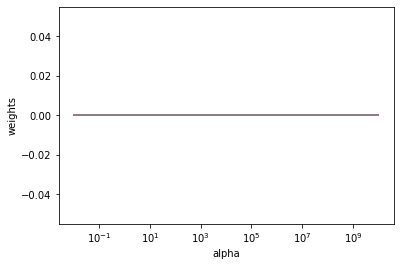

In [45]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
for a in alphas:
 lasso.set_params(alpha=a)
 lasso.fit(X_train, y_train)
 coefs.append(lasso.coef_)
 
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [46]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

0.02143562892376822

In [48]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)

TotalPctDiv        0.405725
agePct16t24        0.353529
PctNotHSGrad       0.265260
racepctblack       0.256233
NumUnderPov        0.217776
racePctHisp        0.120015
PctPopUnderPov     0.116164
PctEmploy          0.106829
PersPerFam         0.100500
agePct65up         0.091184
PctUnemployed      0.079275
pctUrban           0.053889
whitePerCap        0.035606
AsianPerCap        0.027949
PctBSorMore        0.019834
householdsize      0.018906
racePctAsian       0.017992
population         0.013718
HispPerCap         0.010379
perCapInc         -0.000000
numbUrban          0.000000
blackPerCap       -0.039530
indianPerCap      -0.060929
FemalePctDiv      -0.092566
agePct12t21       -0.128775
racePctWhite      -0.137443
PctLess9thGrade   -0.173836
agePct12t29       -0.293329
dtype: float64